### FSOD를 위한 Fater_Rcnn model test

- base datasets : coco-datasets
- learning algorithm : few-shot learning, meta learning
- base algorithm : cnn
- frame work : pytorch

In [1]:
import faster_RCNN as fsod

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from PIL import Image
import json

import torch
from torch.utils.data import DataLoader, Dataset

In [2]:
fsod.utils()

----- Notice -----
device: cuda
cuda num: 1
cude device name: NVIDIA GeForce GTX 1660 Ti
cudnn version: 90100
random rate: 37

numpy version: 1.24.3
matplotlib version: 3.7.3
opencv version: 4.10.0
scikit-learn version: 1.3.2
PIL version: 10.4.0

torch version: 2.4.1
torchvision version: 0.20.0
torchinfo version: 1.8.0
torchmetrics version: 1.5.2


In [3]:
# 데이터 경로부터 하나씩
# image dir
TRAIN_IMAGE_DIR = r'F:\MS-COCO\train2017'
VAL_IMAGE_DIR = r'F:\MS-COCO\val2017'
TEST_IMAGE_DIR = r'F:\MS-COCO\test2017'

# annotarion dir
ANNO_DIR = r'F:\MS-COCO\annotations'

In [4]:
anno_list = os.listdir(ANNO_DIR)

for i in range(len(anno_list)):
    print(anno_list[i])

instances_train2017.json
instances_val2017.json
captions_train2017.json
captions_val2017.json
person_keypoints_train2017.json
person_keypoints_val2017.json
image_info_test2017.json
image_info_test-dev2017.json


In [5]:
train_ds = fsod.CustomDataset(TRAIN_IMAGE_DIR, ANNO_DIR+'\\'+anno_list[0], transform=fsod.image_transformer('train'))
val_ds = fsod.CustomDataset(VAL_IMAGE_DIR, ANNO_DIR+'\\'+anno_list[1], transform=fsod.image_transformer('test'))
# test_ds = Dataset(os.listdir(TEST_IMAGE_DIR)) # 될거 같은데? 이게 안되네

c:\Users\PC\anaconda3\envs\fsod_38\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [6]:
for data in train_ds:
    print(type(data), len(data))
    break


<class 'tuple'> 3


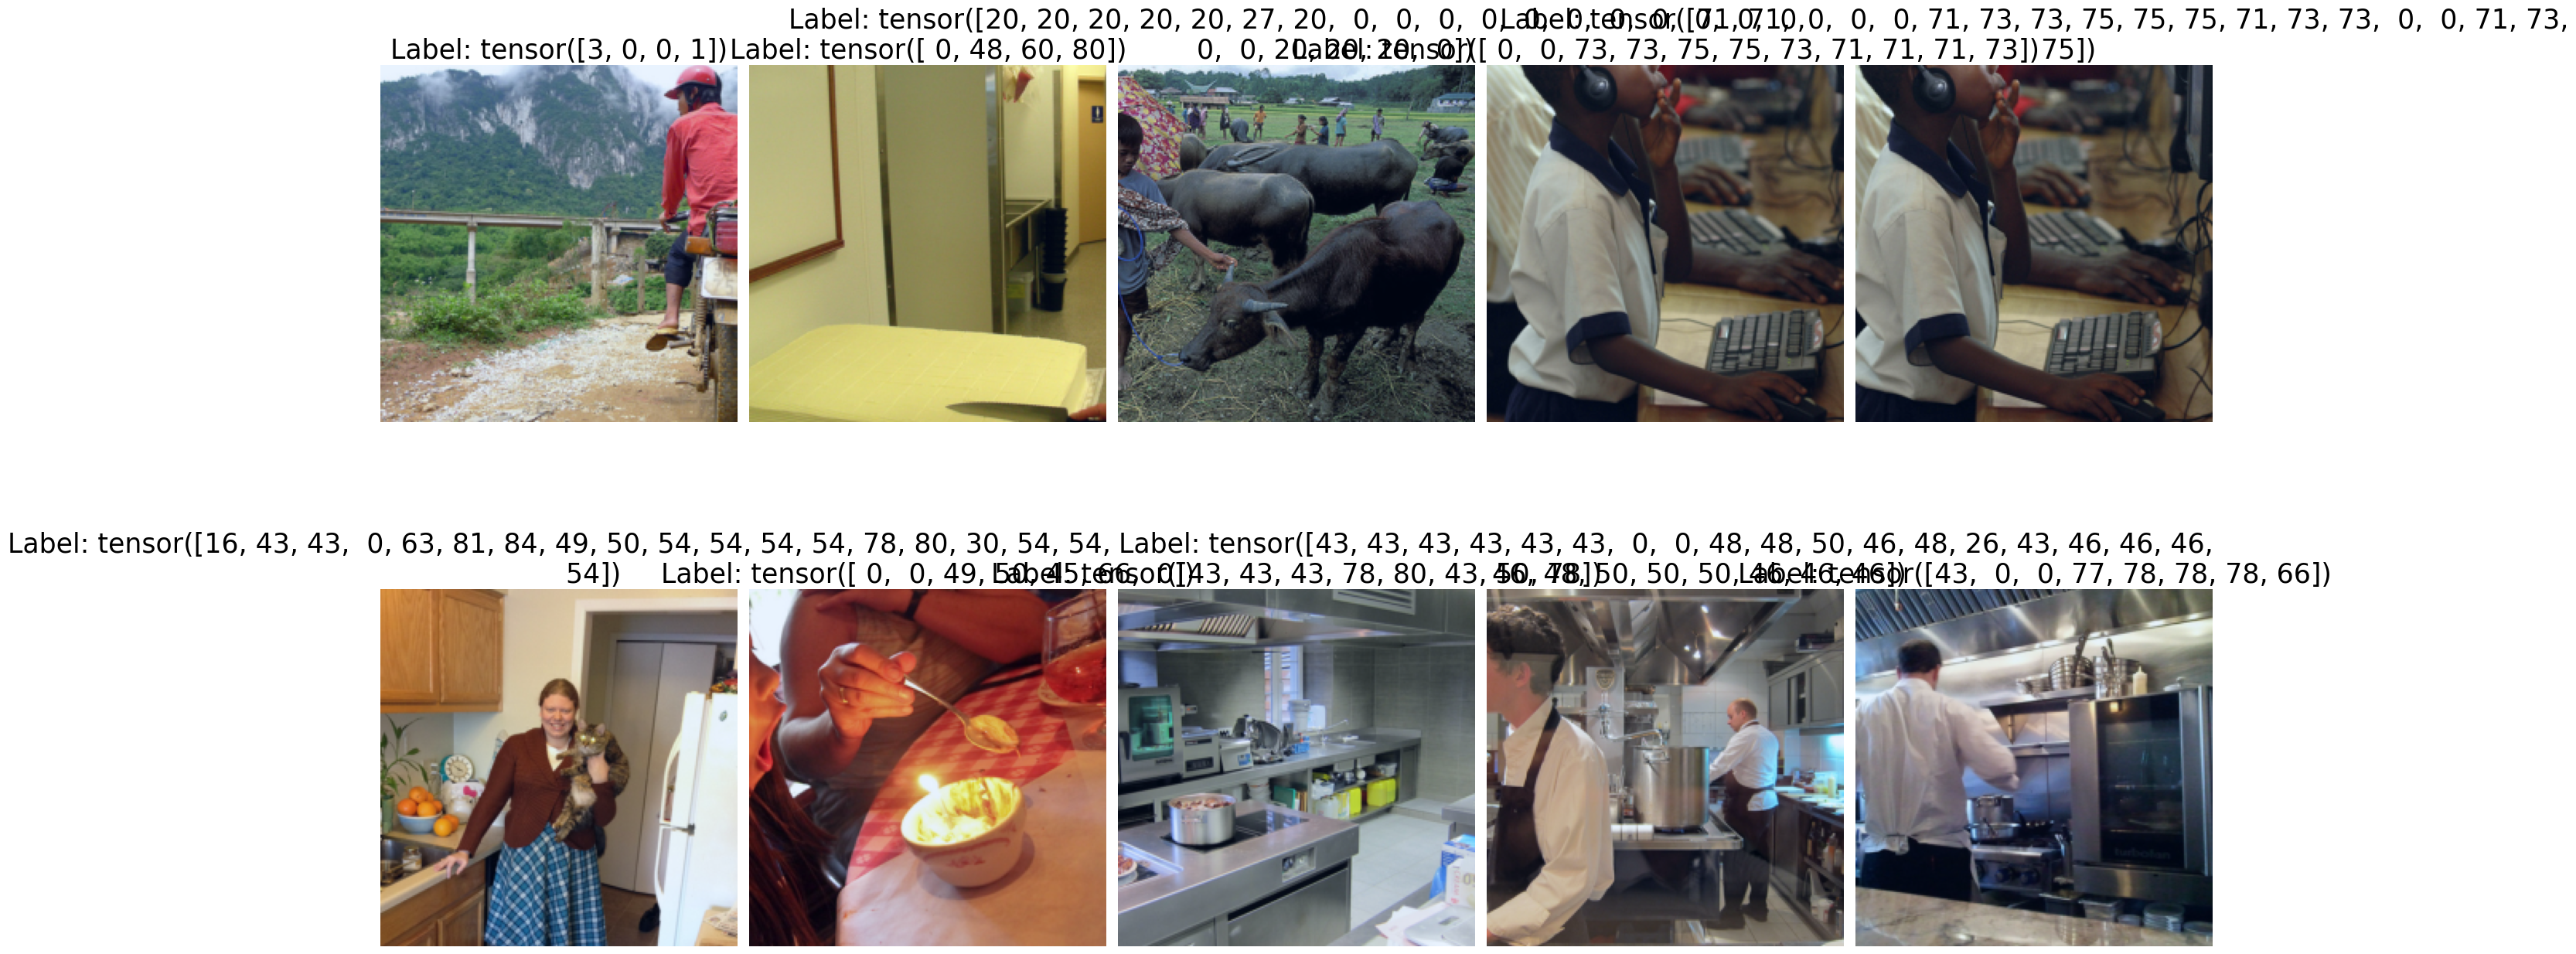

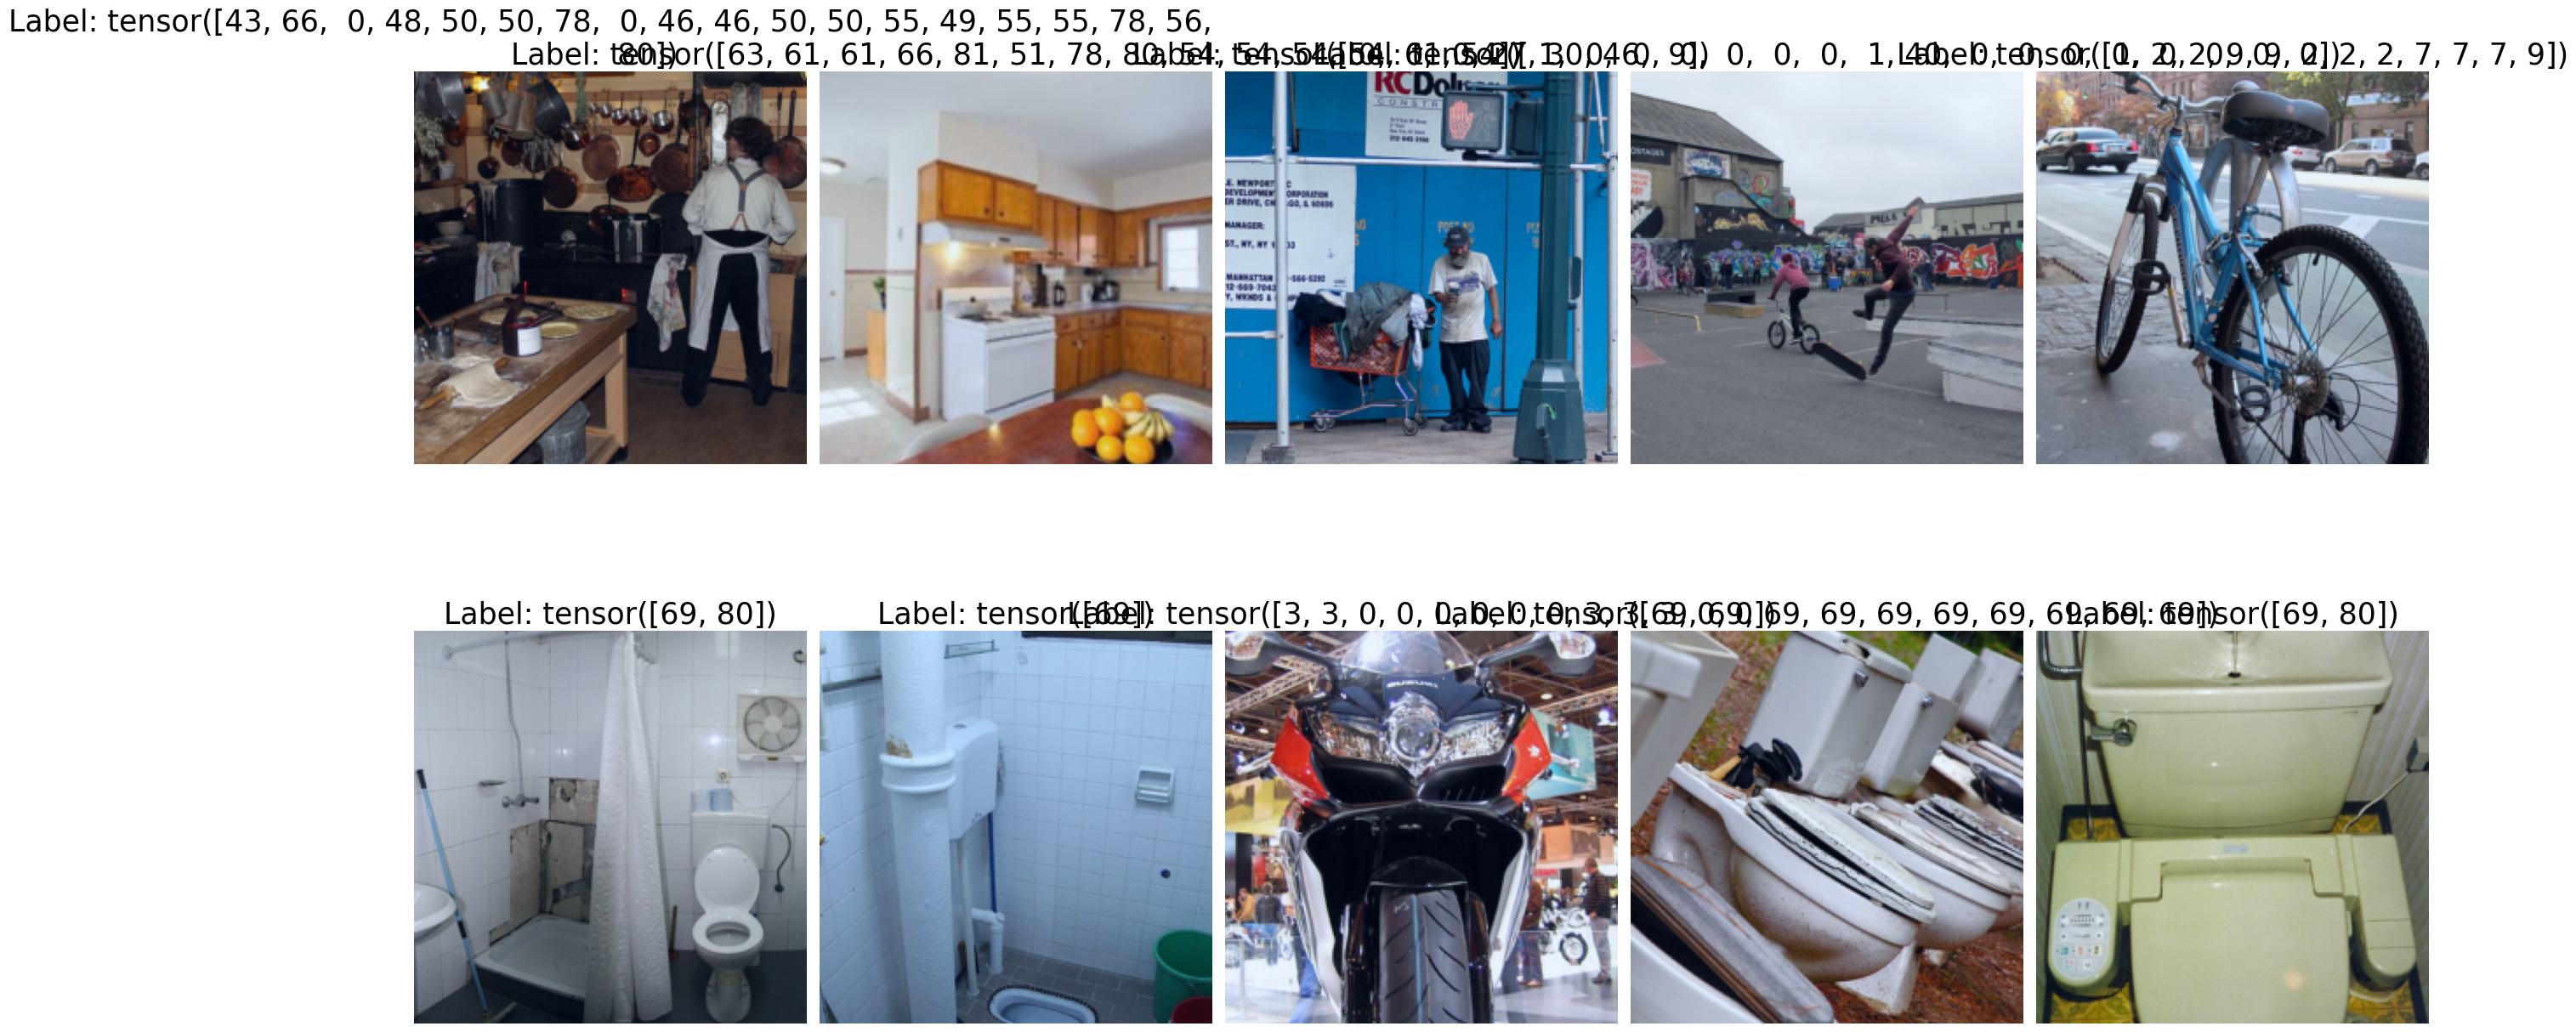

In [7]:
fsod.show_image_dataset(train_ds)
fsod.show_image_dataset(val_ds)


- 뭔가의 코드 테스트
---
    - 오빠들한테 웹에서 annotation 만든 함수 코드달라고 했는데 안줬어

In [8]:
# 새로운 카테고리를 생성 및 annotation file save
category_names = ['Sleepgraound', 'RATH4R', 'DUCKGAE', 'Heptagram', 'ehdgh141', 'SUHYEN']
output_annotation_path = './data/annotation/novel_classes_annotations.json'
image_dir = './data/images/'
nt_image_path = 'hepta_pixely.png'

In [9]:
# create instance
novel_pixely = fsod.CreateNovelClass(category_names, output_annotation_path)

novel_pixely.add_image(
    img_id=1,
    img_path=nt_image_path,
    bboxes=[[428,593,284,403],[1498,592,162,418],[1273,594,200,336],
            [1098,584,105,152],[742,602,169,120],[0,622,456,458]],
    labels=[1,2,3,4,5,6]
)

novel_pixely.save()
print(f"새로운 COCO annotation file이 {output_annotation_path}에 저장되었습니다.")

새로운 COCO annotation file이 ./data/annotation/novel_classes_annotations.json에 저장되었습니다.


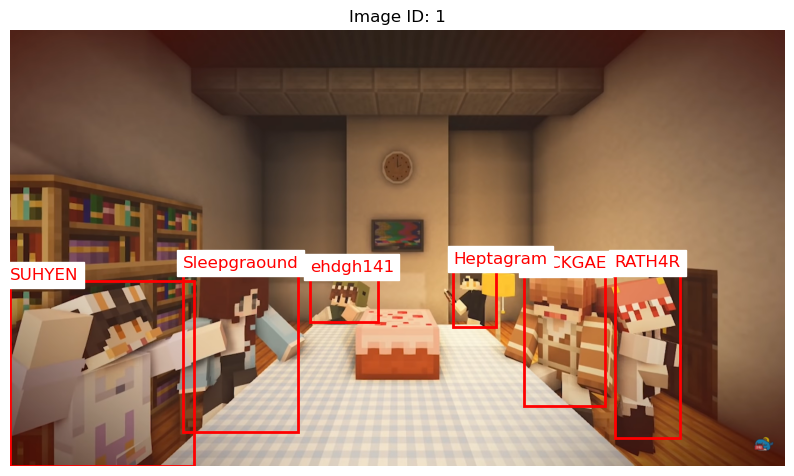

In [10]:
# 특정 이미지 ID를 시각화 (예: 1번 이미지)
# fsod.visualize_annotations(image_dir, output_annotation_path, image_id=1)

# 모든 이미지를 시각화
fsod.visualize_annotations(image_dir, output_annotation_path)


In [11]:
num_classes = 91 + 6
custom_model = fsod.CustomFasterRCNNModel(num_classes).to(fsod.DEVICE)

print(custom_model)
fsod.summary(custom_model)

CustomFasterRCNNModel(
  (faster_rcnn): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False

Layer (type:depth-idx)                                       Param #
CustomFasterRCNNModel                                        --
├─FasterRCNN: 1-1                                            --
│    └─GeneralizedRCNNTransform: 2-1                         --
│    └─BackboneWithFPN: 2-2                                  --
│    │    └─IntermediateLayerGetter: 3-1                     23,454,912
│    │    └─FeaturePyramidNetwork: 3-2                       3,344,384
│    └─RegionProposalNetwork: 2-3                            --
│    │    └─AnchorGenerator: 3-3                             --
│    │    └─RPNHead: 3-4                                     593,935
│    └─RoIHeads: 2-4                                         --
│    │    └─MultiScaleRoIAlign: 3-5                          --
│    │    └─TwoMLPHead: 3-6                                  13,895,680
│    │    └─FastRCNNPredictor: 3-7                           497,125
Total params: 41,786,036
Trainable params: 41,563,636
Non-trainabl

In [12]:
# 사전 학습된 가중치는 남겨야하니까
for named, params in custom_model.named_parameters():
    print(f"[{named}] - {params.shape}")
    params.requires_grad = False

[faster_rcnn.backbone.body.conv1.weight] - torch.Size([64, 3, 7, 7])
[faster_rcnn.backbone.body.layer1.0.conv1.weight] - torch.Size([64, 64, 1, 1])
[faster_rcnn.backbone.body.layer1.0.conv2.weight] - torch.Size([64, 64, 3, 3])
[faster_rcnn.backbone.body.layer1.0.conv3.weight] - torch.Size([256, 64, 1, 1])
[faster_rcnn.backbone.body.layer1.0.downsample.0.weight] - torch.Size([256, 64, 1, 1])
[faster_rcnn.backbone.body.layer1.1.conv1.weight] - torch.Size([64, 256, 1, 1])
[faster_rcnn.backbone.body.layer1.1.conv2.weight] - torch.Size([64, 64, 3, 3])
[faster_rcnn.backbone.body.layer1.1.conv3.weight] - torch.Size([256, 64, 1, 1])
[faster_rcnn.backbone.body.layer1.2.conv1.weight] - torch.Size([64, 256, 1, 1])
[faster_rcnn.backbone.body.layer1.2.conv2.weight] - torch.Size([64, 64, 3, 3])
[faster_rcnn.backbone.body.layer1.2.conv3.weight] - torch.Size([256, 64, 1, 1])
[faster_rcnn.backbone.body.layer2.0.conv1.weight] - torch.Size([128, 256, 1, 1])
[faster_rcnn.backbone.body.layer2.0.conv2.weigh

In [13]:
# 마지막은 업데이트 되어야하니까
for named, params in custom_model.faster_rcnn.roi_heads.named_parameters():
    print(f"[{named}] - {params.shape}")
    params.requires_grad = True

[box_head.fc6.weight] - torch.Size([1024, 12544])
[box_head.fc6.bias] - torch.Size([1024])
[box_head.fc7.weight] - torch.Size([1024, 1024])
[box_head.fc7.bias] - torch.Size([1024])
[box_predictor.cls_score.weight] - torch.Size([97, 1024])
[box_predictor.cls_score.bias] - torch.Size([97])
[box_predictor.bbox_pred.weight] - torch.Size([388, 1024])
[box_predictor.bbox_pred.bias] - torch.Size([388])


In [14]:
n = 0
for data in train_ds:
    if n == 5:
        break
    print(data[0].shape, data[1])
    n+=1


torch.Size([3, 224, 224]) tensor([3, 0, 0, 1])
torch.Size([3, 224, 224]) tensor([ 0, 48, 60, 80])
torch.Size([3, 224, 224]) tensor([20, 20, 20, 20, 20, 27, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 20, 20, 20,  0])
torch.Size([3, 224, 224]) tensor([ 0,  0, 73, 73, 75, 75, 73, 71, 71, 71, 73])
torch.Size([3, 224, 224]) tensor([71, 71,  0,  0,  0, 71, 73, 73, 75, 75, 75, 71, 73, 73,  0,  0, 71, 73,
        75])


In [15]:
n = 0
for data in val_ds:
    if n == 5:
        break
    print(data[0].shape, data[1])
    n+=1


torch.Size([3, 224, 224]) tensor([43, 66,  0, 48, 50, 50, 78,  0, 46, 46, 50, 50, 55, 49, 55, 55, 78, 56,
        80])
torch.Size([3, 224, 224]) tensor([63, 61, 61, 66, 81, 51, 78, 80, 54, 54, 54, 54, 61, 54])
torch.Size([3, 224, 224]) tensor([ 0,  0,  0, 27, 30, 46,  9])
torch.Size([3, 224, 224]) tensor([ 1,  0,  0,  0,  0,  0,  0,  1, 40,  0,  0,  0,  0,  0,  0,  0,  0])
torch.Size([3, 224, 224]) tensor([1, 2, 2, 9, 9, 2, 2, 2, 7, 7, 7, 9])


In [16]:
epoch = 5

loss, acc, f1 = fsod.training(custom_model, train_ds, val_ds, epoch, num_classes)

Targets in batch: [tensor([55, 66]), tensor([5, 5, 5, 5, 0, 0, 0, 2, 2, 2, 5, 0, 0, 2, 2, 2]), tensor([ 0,  0,  0, 58,  0,  0]), tensor([2, 5, 9, 2, 9, 9, 2, 2]), tensor([ 0, 34]), tensor([ 0, 42, 61]), tensor([27,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0]), tensor([64, 64, 61])]



c:\Users\PC\Desktop\AI_KDT6\KDT6\ko_alpha\faster_RCNN.py:614: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_targets = pad_sequence([torch.tensor(target) for target in targets], batch_first=True, padding_value=-1)


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 8, 224, 224] to have 3 channels, but got 8 channels instead

In [ ]:
# # 쿼리와 지원 데이터 생성
# query_data = torch.randn(16, 3, 224, 224).to(fsod.DEVICE)  # 쿼리 이미지
# support_data = torch.randn(16, 3, 224, 224).to(fsod.DEVICE)  # 지원 이미지
# y_data = torch.randint(0, 2, (16,)).to(fsod.DEVICE)  # 정답 라벨

# # Validation 실행
# val_loss, val_acc, val_f1, val_mat = fsod.validation(custom_model, query_data, support_data, y_data, num_classes)
# print(f"Validation Loss: {val_loss}, Accuracy: {val_acc}, F1 Score: {val_f1}")

# # Testing 실행
# test_loss, test_acc, test_f1, test_mat = fsod.testing(custom_model, query_data, support_data, y_data, num_classes)
# print(f"Test Loss: {test_loss}, Accuracy: {test_acc}, F1 Score: {test_f1}")

# # show_mat(val_mat, 'validation')
# fsod.show_mat(test_mat, 'test')